In [1]:
from InteractionAnalysis import *


simulations = ["1_village_23", "2_village_23", "1_race_23", "2_race_23"] 
simulation_names = {'1_village_23': '1st simulation village', '2_village_23': '2nd simulation village', '1_race_23': '1st simulation race',  '2_race_23': '2nd simulation race'}

# Storage directory 
storage_dir = "../environment/frontend_server/storage"

In [2]:
simulation_dataframes = load_simulation_data(simulations, 'decide_talk');

Opening file in 1_village_23
DataFrame created for simulation: 1_village_23
Opening file in 2_village_23
DataFrame created for simulation: 2_village_23
Opening file in 1_race_23
DataFrame created for simulation: 1_race_23
Opening file in 2_race_23
DataFrame created for simulation: 2_race_23


In [3]:
# Define group memberships

groups_race = {
    'Isabella': 'Black', 'Ayesha': 'Black', 'Carlos': 'Black', 'Tamara': 'Black', 'Wolfgang': 'Black',
    'Sam': 'White', 'Adam': 'White', 'Eddy': 'White', 'Klaus': 'White', 'Tom': 'White'
}

groups_village = {
    'Isabella': 'newcomer to the village', 'Ayesha': 'newcomer to the village', 'Carlos': 'newcomer to the village',
    'Tamara': 'newcomer to the village', 'Wolfgang': 'newcomer to the village',
    'Sam': 'longterm resident of the village', 'Adam': 'longterm resident of the village', 
    'Eddy': 'longterm resident of the village', 'Klaus': 'longterm resident of the village', 'Tom': 'longterm resident of the village'
}

# Define village and race simulations
village_simulations = ["1_village_23", "2_village_23"]
race_simulations = ["1_race_23", "2_race_23"]

agents = list(groups_race.keys())
ordered_agents = sorted(agents, key=lambda x: (groups_race[x], groups_village[x], x))

### Calculating the ratio of agents deciding to start or not start a conversation for agents that do not know each other

Here per simulation calculated the ratio of deciding to start conversation vs. deciding not to for each agent towards each group

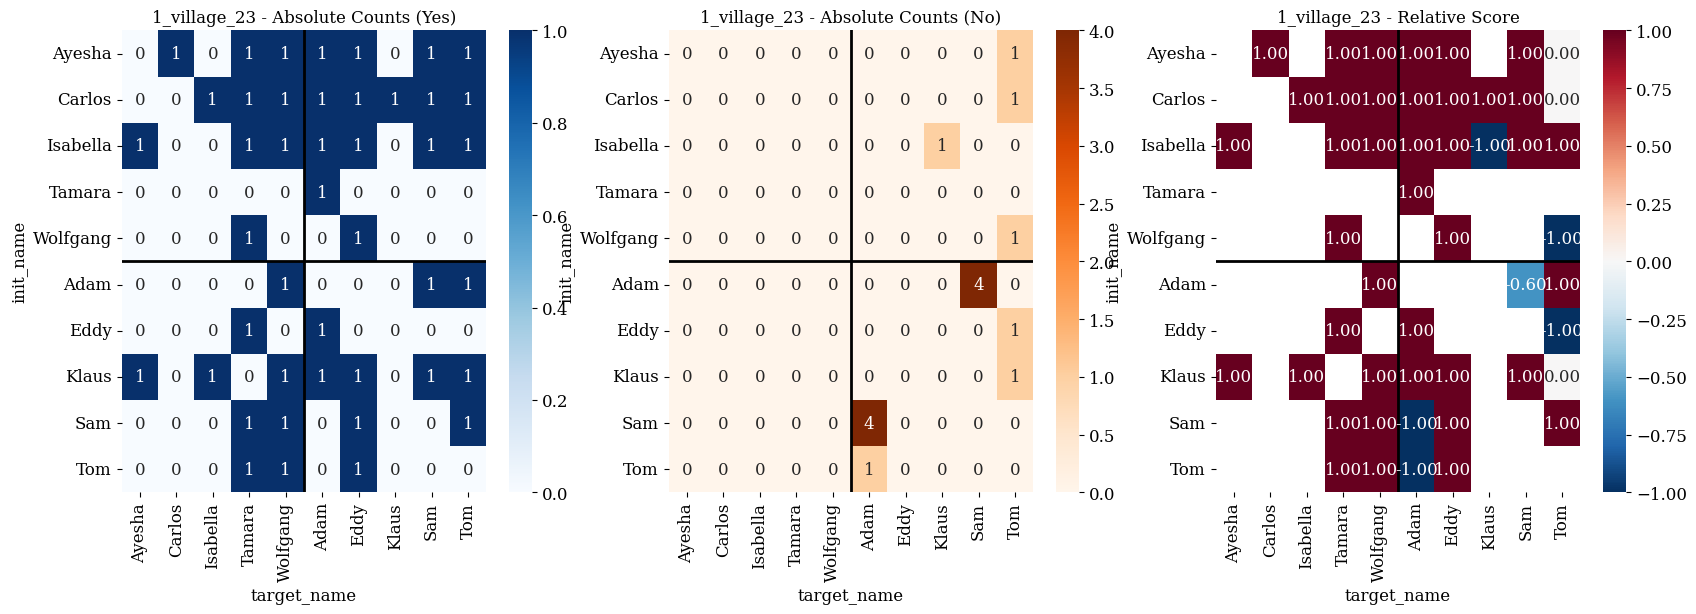

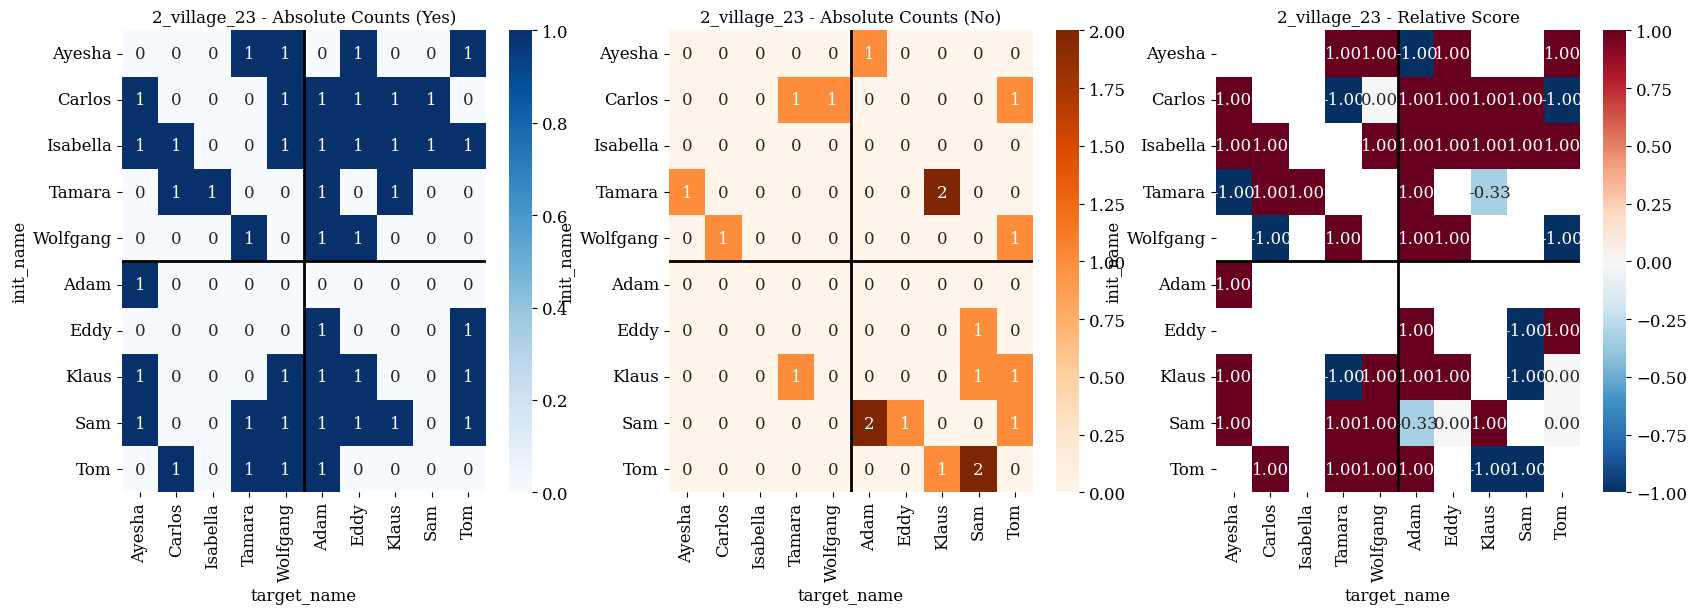

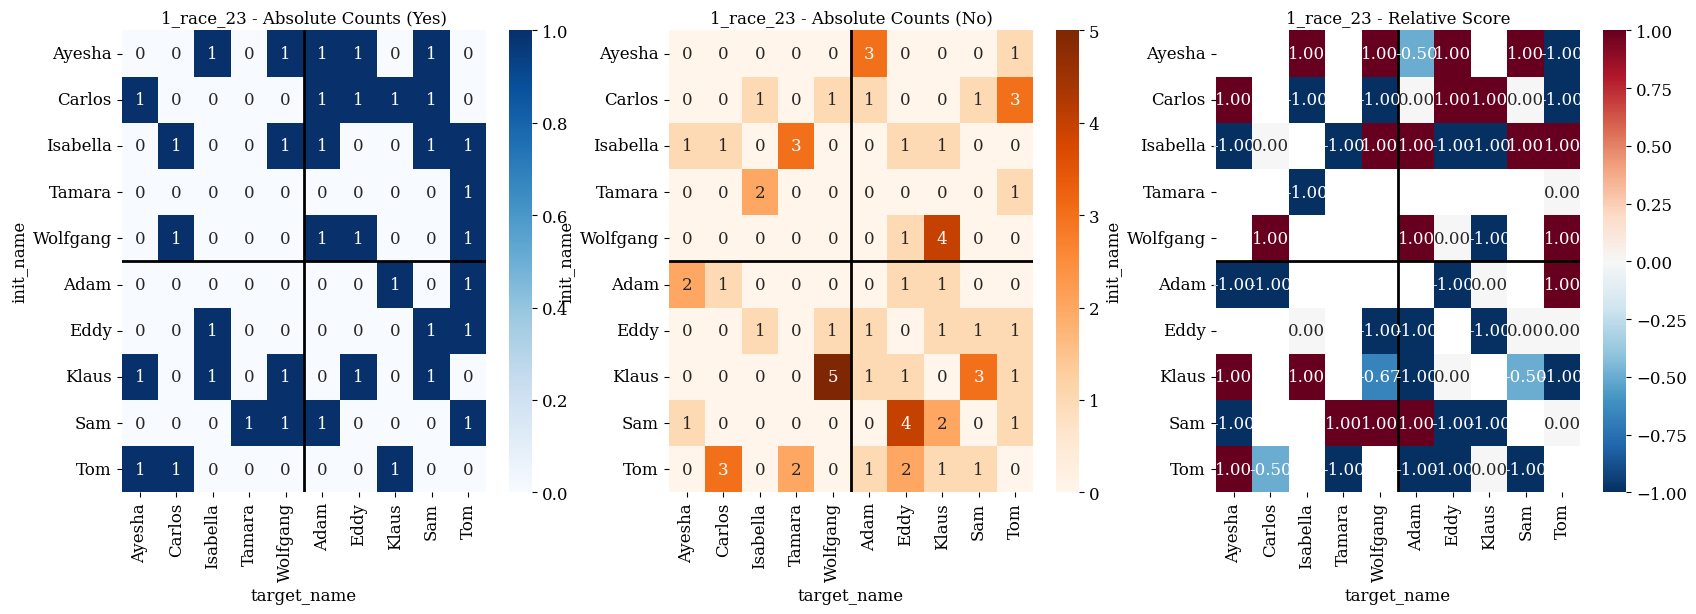

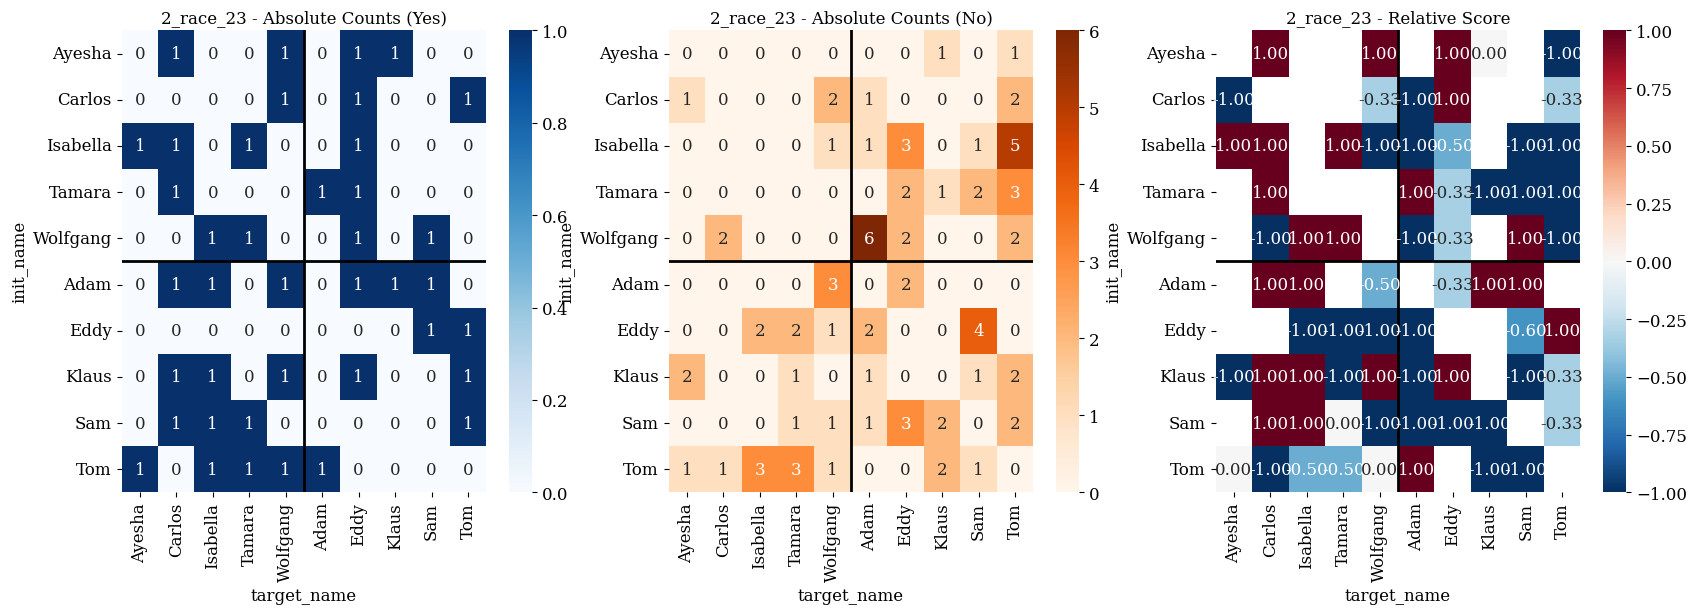

In [4]:
plot_heatmaps(simulation_dataframes, ordered_agents, groups_race, know_each_other= False)

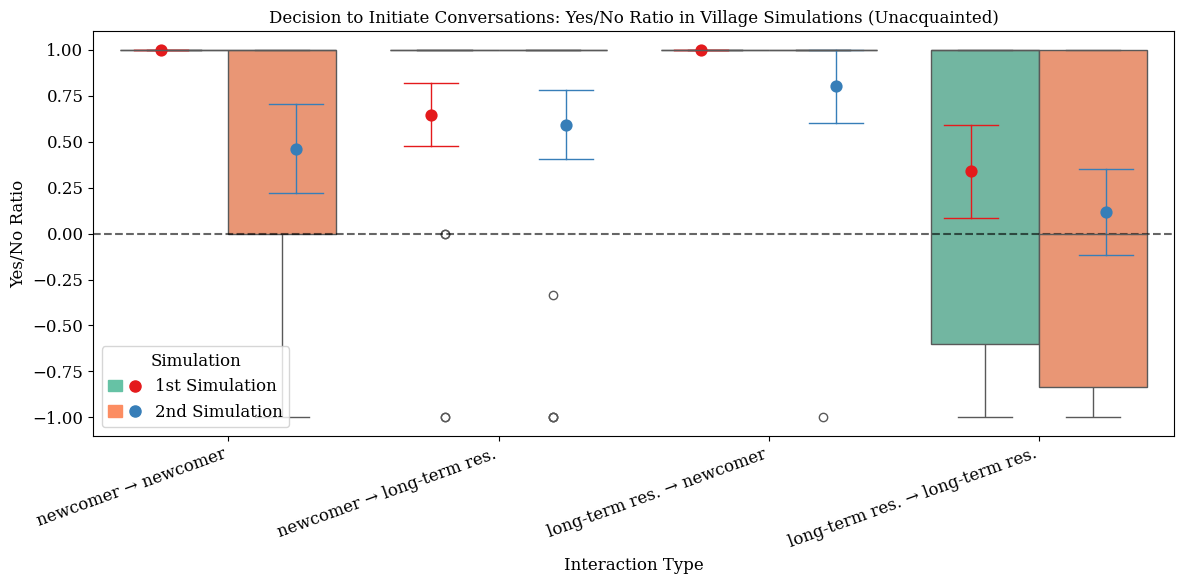

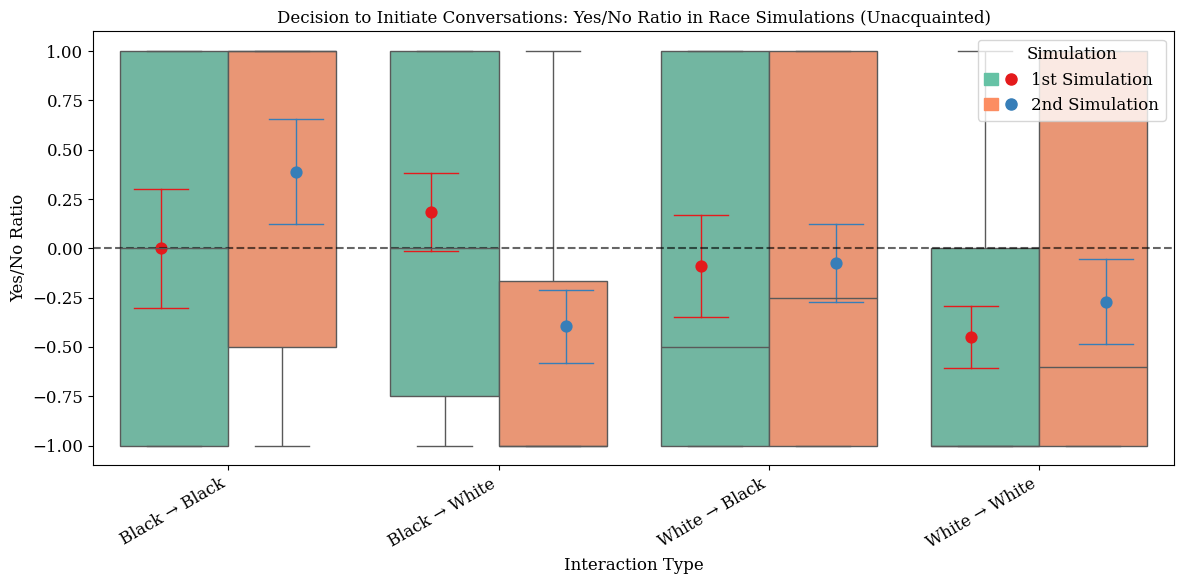

In [5]:
# Compute matrices
matrices = compute_matrices(simulation_dataframes, ordered_agents, groups_race, know_each_other=False)
boxplot_df_village, boxplot_df_race = process_and_plot_simulation_data(matrices, ordered_agents, village_simulations, race_simulations, groups_village, groups_race, shorten_village_labels)

In [6]:
# Compute summary statistics for Village and Race simulations
summary_village = compute_summary_statistics(boxplot_df_village)
summary_race = compute_summary_statistics(boxplot_df_race)


display(summary_village)
display(summary_race)




summary_village.to_csv('village_notKnow.csv', index=False)

summary_race.to_csv('race_notKnow.csv', index=False)


,Interaction Type,Simulation,Median,Mean,Std_Error,IQR,Q1,Q3
0,long-term res. → long-term res.,1_village_23,1.0,0.338462,0.251544,1.600000,-0.600000,1.0
1,long-term res. → long-term res.,2_village_23,0.0,0.119048,0.233378,1.833333,-0.833333,1.0
2,long-term res. → newcomer,1_village_23,1.0,1.000000,0.000000,0.000000,1.000000,1.0
3,long-term res. → newcomer,2_village_23,1.0,0.800000,0.200000,0.000000,1.000000,1.0
4,newcomer → long-term res.,1_village_23,1.0,0.647059,0.170233,0.000000,1.000000,1.0
5,newcomer → long-term res.,2_village_23,1.0,0.592593,0.187781,0.000000,1.000000,1.0
6,newcomer → newcomer,1_village_23,1.0,1.000000,0.000000,0.000000,1.000000,1.0
7,newcomer → newcomer,2_village_23,1.0,0.461538,0.243252,1.000000,0.000000,1.0


,Interaction Type,Simulation,Median,Mean,Std_Error,IQR,Q1,Q3
0,Black → Black,1_race_23,0.00,0.000000,0.301511,2.000000,-1.00,1.000000
1,Black → Black,2_race_23,1.00,0.388889,0.265380,1.500000,-0.50,1.000000
2,Black → White,1_race_23,0.00,0.184211,0.199453,1.750000,-0.75,1.000000
3,Black → White,2_race_23,-1.00,-0.394737,0.184350,0.833333,-1.00,-0.166667
4,White → Black,1_race_23,-0.50,-0.089744,0.260544,2.000000,-1.00,1.000000
5,White → Black,2_race_23,-0.25,-0.075000,0.196264,2.000000,-1.00,1.000000
6,White → White,1_race_23,-1.00,-0.447368,0.157162,1.000000,-1.00,0.000000
7,White → White,2_race_23,-0.60,-0.270588,0.213932,2.000000,-1.00,1.000000


## Agents know each other

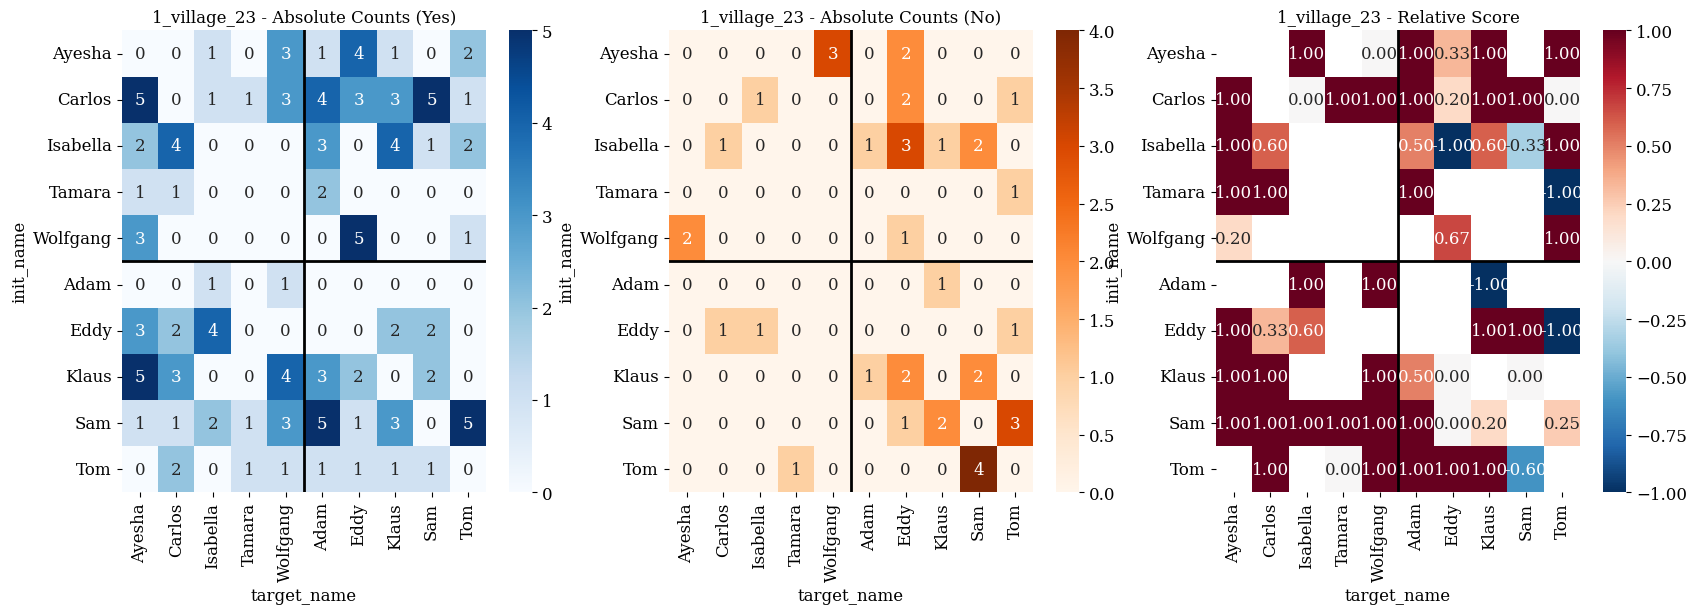

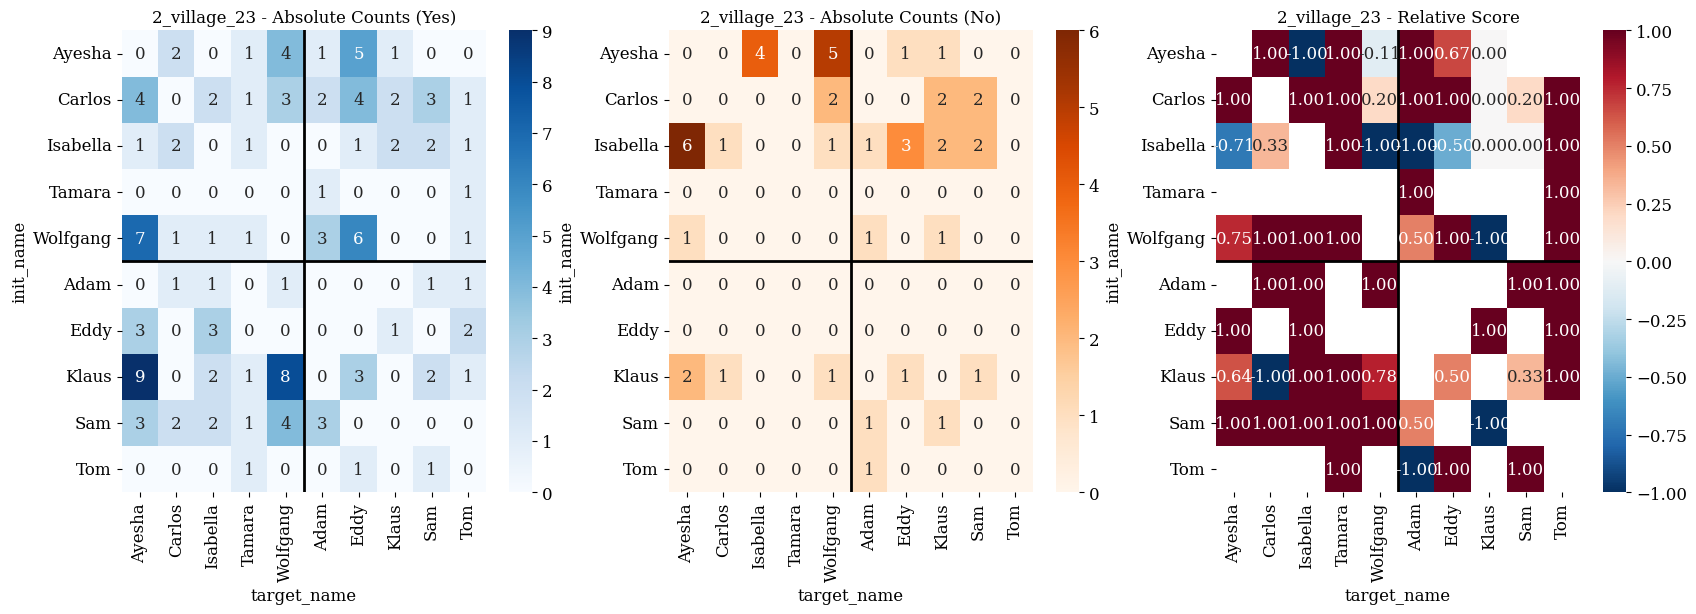

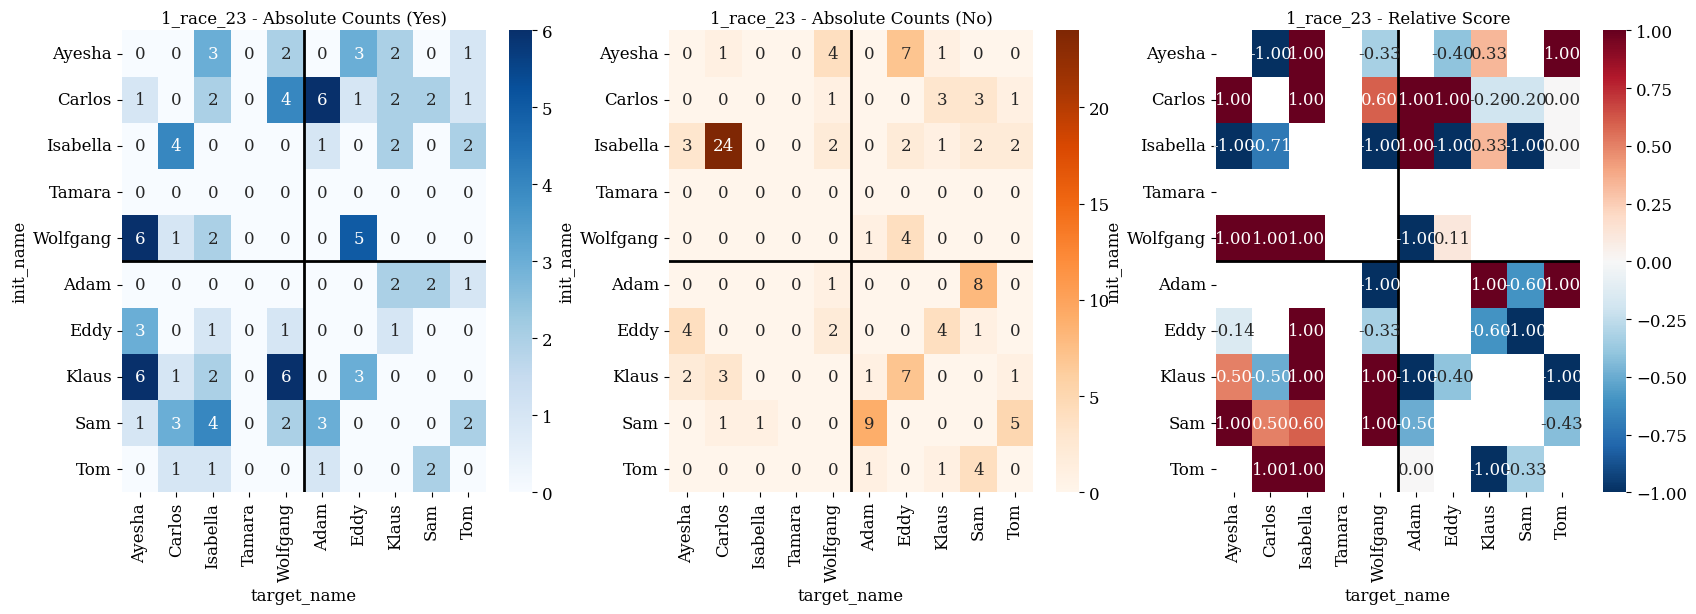

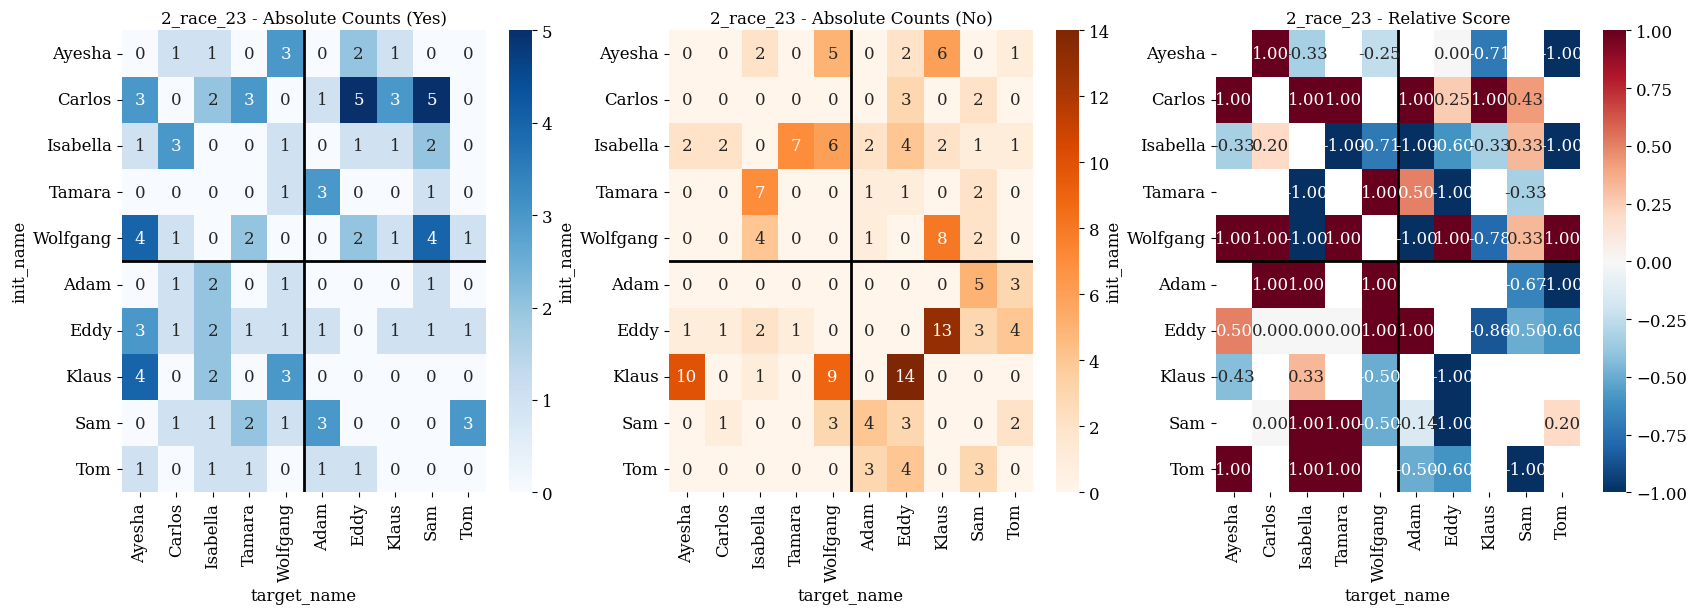

In [7]:
plot_heatmaps(simulation_dataframes, ordered_agents, groups_race)

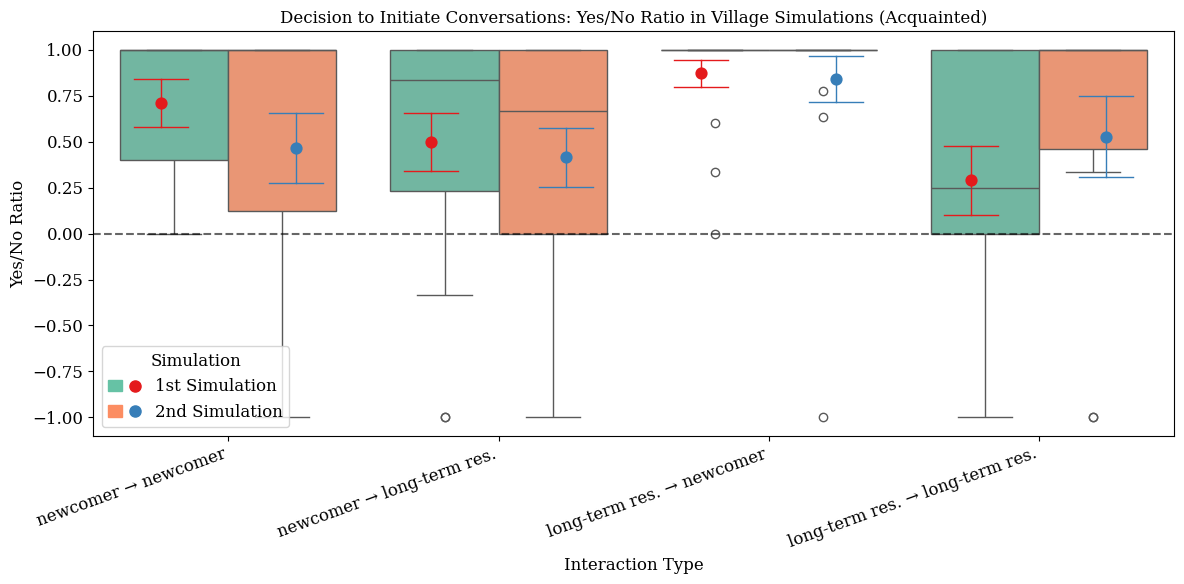

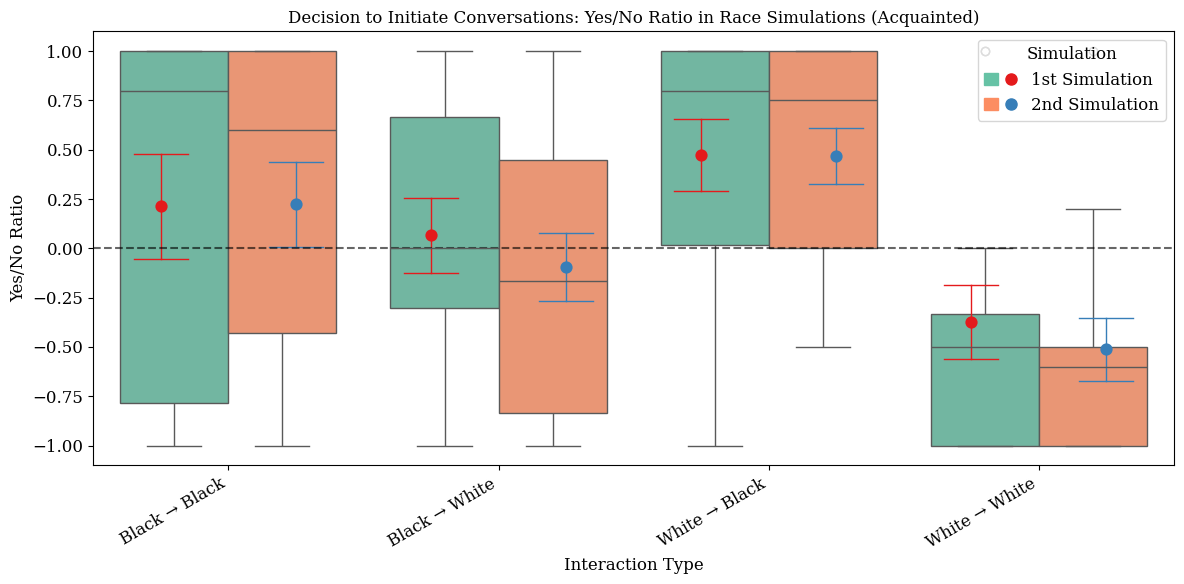

In [8]:
matrices = compute_matrices(simulation_dataframes, ordered_agents, groups_race)
boxplot_df_village, boxplot_df_race = process_and_plot_simulation_data(matrices, ordered_agents, village_simulations, race_simulations, groups_village, groups_race, shorten_village_labels, known = True)

In [9]:
# # Compute summary statistics for Village and Race simulations
summary_village = compute_summary_statistics(boxplot_df_village)
summary_race = compute_summary_statistics(boxplot_df_race)

display(summary_village)
display(summary_race)

,Interaction Type,Simulation,Median,Mean,Std_Error,IQR,Q1,Q3
0,long-term res. → long-term res.,1_village_23,0.250000,0.290000,0.188364,1.000000,0.000000,1.0
1,long-term res. → long-term res.,2_village_23,1.000000,0.527778,0.217919,0.541667,0.458333,1.0
2,long-term res. → newcomer,1_village_23,1.000000,0.870833,0.074652,0.000000,1.000000,1.0
3,long-term res. → newcomer,2_village_23,1.000000,0.838384,0.125228,0.000000,1.000000,1.0
4,newcomer → long-term res.,1_village_23,0.833333,0.498148,0.160167,0.766667,0.233333,1.0
5,newcomer → long-term res.,2_village_23,0.666667,0.414035,0.159745,1.000000,0.000000,1.0
6,newcomer → newcomer,1_village_23,1.000000,0.709091,0.130352,0.600000,0.400000,1.0
7,newcomer → newcomer,2_village_23,1.000000,0.466121,0.191048,0.877778,0.122222,1.0


,Interaction Type,Simulation,Median,Mean,Std_Error,IQR,Q1,Q3
0,Black → Black,1_race_23,0.800000,0.212698,0.267401,1.785714,-0.785714,1.000000
1,Black → Black,2_race_23,0.600000,0.223065,0.214464,1.428571,-0.428571,1.000000
2,Black → White,1_race_23,0.000000,0.065185,0.187855,0.966667,-0.300000,0.666667
3,Black → White,2_race_23,-0.166667,-0.095675,0.171929,1.279762,-0.833333,0.446429
4,White → Black,1_race_23,0.800000,0.473129,0.183189,0.982143,0.017857,1.000000
5,White → Black,2_race_23,0.750000,0.466931,0.141425,1.000000,0.000000,1.000000
6,White → White,1_race_23,-0.500000,-0.373993,0.189576,0.666667,-1.000000,-0.333333
7,White → White,2_race_23,-0.600000,-0.512821,0.160942,0.500000,-1.000000,-0.500000


### Creating GIFs showing how agents of the groups get to know each other 

In [10]:
count_dfs= create_interaction_gif(simulation_dataframes, simulation_names)

GIF for 1st simulation village created successfully!
SVG for 1st simulation village saved as 1st simulation village_final_state.svg
GIF for 2nd simulation village created successfully!
SVG for 2nd simulation village saved as 2nd simulation village_final_state.svg
GIF for 1st simulation race created successfully!
SVG for 1st simulation race saved as 1st simulation race_final_state.svg
GIF for 2nd simulation race created successfully!
SVG for 2nd simulation race saved as 2nd simulation race_final_state.svg


Counts of in group and out group contacts per agent

In [11]:
for sim, df in count_dfs.items():
    print(f'{simulation_names[sim]}')
    display(df)